In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [5]:
df.tail(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.sample(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
118,7.7,2.6,6.9,2.3,Iris-virginica
79,5.7,2.6,3.5,1.0,Iris-versicolor
140,6.7,3.1,5.6,2.4,Iris-virginica


In [9]:
class_counts = df['Species'].value_counts()
print(class_counts)

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


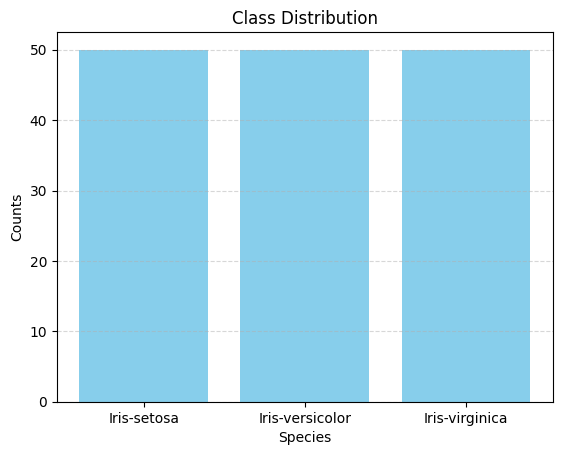

In [10]:
plt.Figure(figsize=(10,6))
plt.bar(class_counts.index,class_counts.values,color='skyblue')
plt.xlabel("Species")
plt.ylabel("Counts")
plt.title("Class Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig('class distribution.svg', format='svg')
plt.show()


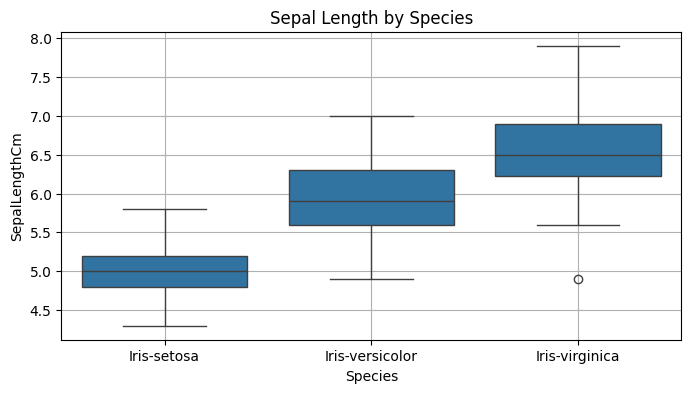

In [12]:
# Visualize with boxplot

plt.figure(figsize=(8,4))
sns.boxplot(df, x='Species', y='SepalLengthCm')
plt.title("Sepal Length by Species")
plt.grid(True)
plt.show()

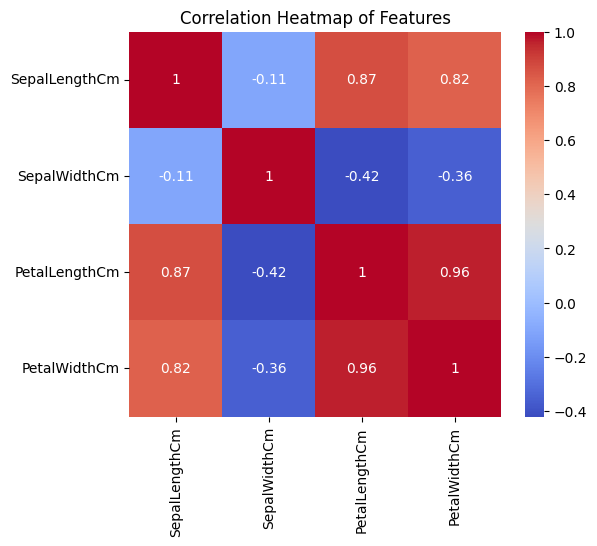

In [15]:
# Plot Correlation Heatmap

plt.figure(figsize=(6,5))
sns.heatmap(df.drop(columns=['Species']).corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.show()

In [16]:
X = df.drop(columns=['Species'])
y = df['Species']            

In [18]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [22]:
# 1.
knn_model = KNeighborsClassifier(n_neighbors=7)
#2.
knn_model.fit(X_train,y_train)
#3.
knn_preds = knn_model.predict(X_test)
#4.
print("Accuracy=" ,accuracy_score(y_test,knn_preds)*100)


Accuracy= 96.66666666666667


In [23]:
print(classification_report(y_test,knn_preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



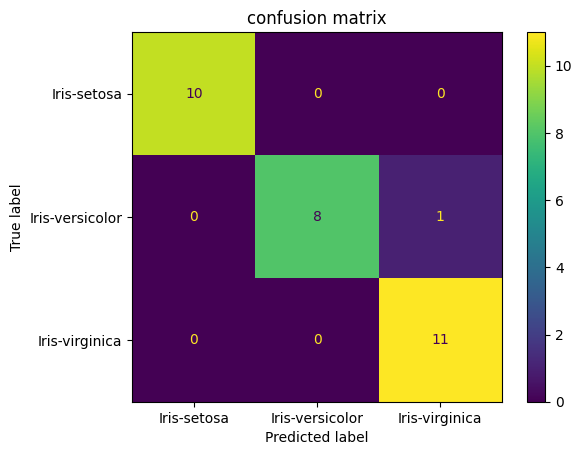

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,knn_preds)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=y.unique())
cm_plot.plot()
plt.title("confusion matrix")
plt.show()

In [25]:
((knn_preds == y_test).sum()/len(y_test))*100

96.66666666666667

In [26]:
import joblib
joblib.dump(knn_model,'knn_model.pkl')
print("SUCESS")

SUCESS


In [27]:
X_test.head(1), y_test.head(1)

(    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 73            6.1           2.8            4.7           1.2,
 73    Iris-versicolor
 Name: Species, dtype: object)